In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from findiff import FinDiff

In [ ]:
x = np.linspace(0, 2*np.pi, 10)
y = np.cos(x)

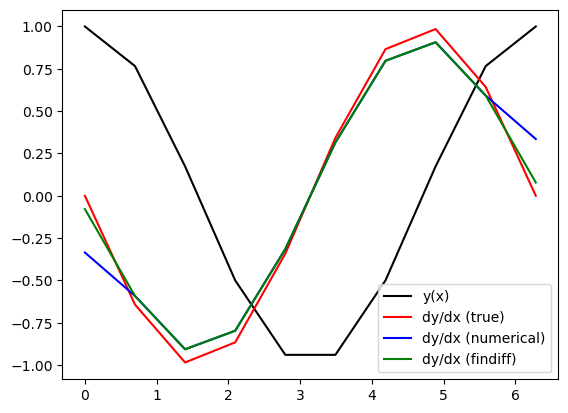

In [ ]:
dy_dx_true = -np.sin(x)

dx = np.diff(x)[0]
dy_dx_numerical = np.zeros_like(y) 
dy_dx_numerical[1:-1] = (y[2:] - y[:-2])/(2*dx) # central difference scheme
dy_dx_numerical[0] = (y[1] - y[0])/dx # forward difference
dy_dx_numerical[-1] = (y[-1] - y[-2])/dx # backward difference

d_dx = FinDiff(0, dx, 1)
dy_dx_findiff = d_dx(y)

plt.plot(x, y, color='k', label='y(x)')
plt.plot(x, dy_dx_true, color='r', label='dy/dx (true)')
plt.plot(x, dy_dx_numerical, color='b', label='dy/dx (numerical)')
plt.plot(x, dy_dx_findiff, color='g', label='dy/dx (findiff)')

plt.legend()
plt.show()

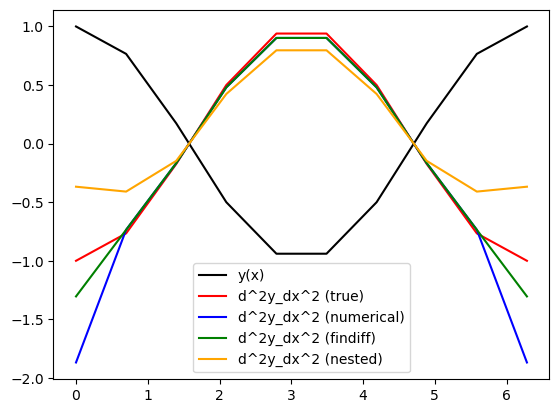

In [ ]:
ddy_ddx_true = -np.cos(x)

dx = np.diff(x)[0]
ddy_ddx_numerical = np.zeros_like(y)
ddy_ddx_numerical[1:-1] = (y[2:] - 2*y[1:-1] + y[:-2])/(dx**2)
ddy_ddx_numerical[0] = (2*y[0] - 5*y[1] + 4*y[2] - y[3])/(dx**3)
ddy_ddx_numerical[-1] = (2*y[-1] - 5*y[-2] + 4*y[-3] - y[-4])/(dx**3)

ddy_ddx_num = np.zeros_like(dy_dx_numerical)
ddy_ddx_num[1:-1] = (dy_dx_numerical[2:] - dy_dx_numerical[:-2])/(2*dx)
ddy_ddx_num[0] = (dy_dx_numerical[1] - dy_dx_numerical[0])/dx 
ddy_ddx_num[-1] = (dy_dx_numerical[-1]-dy_dx_numerical[-2])/dx

dd_ddx = FinDiff(0, dx, 2)
ddy_ddx_findiff = dd_ddx(y)

plt.plot(x, y, color='k', label='y(x)')
plt.plot(x, ddy_ddx_true, color='r', label='d^2y_dx^2 (true)')
plt.plot(x, ddy_ddx_numerical, color='b', label='d^2y_dx^2 (numerical)')
plt.plot(x, ddy_ddx_findiff, color='g', label='d^2y_dx^2 (findiff)')
plt.plot(x, ddy_ddx_num, color='orange', label='d^2y_dx^2 (nested)')

plt.legend()
plt.show()